### Task 1

Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочных данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
boston = load_boston()
X = boston.data
feature_names = boston.feature_names
X = pd.DataFrame(X, columns=feature_names)
y = boston.target
y = pd.DataFrame(y, columns=['Price'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()

In [5]:
X_train_scaled = scaler.fit_transform(X_train)

In [6]:
X_test_scaled = scaler.transform(X_test)

In [7]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

In [8]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [9]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [10]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [11]:
X_train_tsne[:5, :]

array([[ 17.645624 ,  28.406218 ],
       [  1.6133794, -11.563689 ],
       [-14.5985   , -16.157717 ],
       [ 27.65398  ,  24.220755 ],
       [  3.8739002,  -9.40449  ]], dtype=float32)

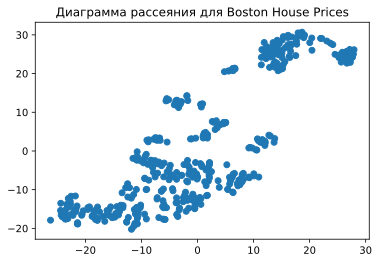

In [12]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1]);
plt.title('Диаграмма рассеяния для Boston House Prices');

### Task 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [15]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [16]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

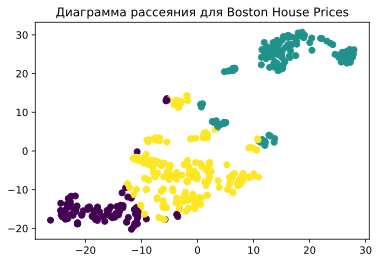

In [17]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train);
plt.title('Диаграмма рассеяния для Boston House Prices');

In [18]:
for i in range(3):
    print(y_train.loc[labels_train==i, 'Price'].mean())

27.788372093023252
16.165354330708666
24.958115183246072


In [19]:
for i in range(3):
    print(X_train_scaled.loc[labels_train==i, 'CRIM'].mean())

-0.3988641865191748
0.8109035550510459
-0.3595938819415387


### Task 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [20]:
labels_test = kmeans.predict(X_test_scaled)

In [21]:
for i in range(3):
    print(y_test.loc[labels_test==i, 'Price'].mean())

31.35
16.437142857142856
21.860784313725492


In [22]:
for i in range(3):
    print(X_test.loc[labels_test==i, 'CRIM'].mean())

0.062060000000000004
10.165531142857143
0.26607882352941176
